In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [3]:
def read_files(path):
    df_scores = []
    for file in os.listdir(path):
        if file[0] != '.':
            df = pd.read_csv(path + file)[['Unnamed: 0','recall@10']].rename(columns={'Unnamed: 0': 'ground truth item position', 'recall@10': 'HR@10'})
            df['dataset'] = file.split('_')[-1][:-4]
            mode = file.split('_')[1]
            if mode == 'temperature':
                df['Strategy:'] = 'multi-sequence'
            else:
                df['Strategy:'] = mode
            df_scores.append(df)
            
    df_scores = pd.concat(df_scores, axis=0)
    df_scores['ground truth item position'] = df_scores['ground truth item position'] + 1

    return df_scores.sort_values(['Strategy:','dataset'])

In [4]:
path = 'data/step_plots/'
metrics = read_files(path)

In [5]:
metrics

,ground truth item position,HR@10,dataset,Strategy:
0,1,0.205960,ML-1M,greedy
1,2,0.184768,ML-1M,greedy
2,3,0.172848,ML-1M,greedy
3,4,0.173510,ML-1M,greedy
4,5,0.158278,ML-1M,greedy
5,6,0.150331,ML-1M,greedy
6,7,0.130132,ML-1M,greedy
7,8,0.129470,ML-1M,greedy
8,9,0.106291,ML-1M,greedy
9,10,0.092053,ML-1M,greedy


In [6]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

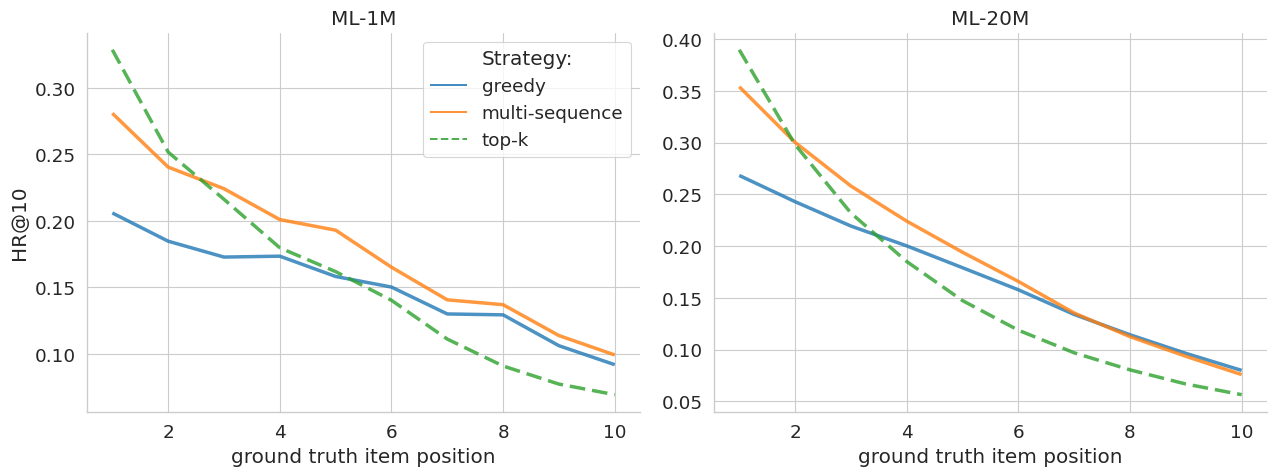

In [7]:
WIDTH = 2.5
ALPHA = 0.8
grid = sns.relplot(data=metrics, x='ground truth item position', y='HR@10', kind='line', aspect=1.3, hue='Strategy:', style='Strategy:', col='dataset', linewidth=WIDTH, alpha=ALPHA, facet_kws={'sharex': False, 'sharey': False, 'legend_out': False}, dashes=[(1, 0),(1, 0),(4.5, 2)])
           
grid.set_titles(col_template='{col_name}')
plt.show()

In [8]:
grid.savefig('position.png', dpi=800)